In [5]:
# dependencias
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import pandas as pd
from cycler import cycler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min

import sklearn
import os
from os import path
from wordcloud import WordCloud
import wordcloud
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabaz_score


In [2]:
#função auxiliar para visualizaçao tsne
def visualize_scatter(data_2d, label_ids, starting_cluster, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    label_ids = label_ids - starting_cluster
    
    nb_classes = len(np.unique(label_ids))
    i = 0
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.tab20b(label_id / float(nb_classes)),
                    linewidth='10',
                    alpha=0.8,
                    label=np.arange(nb_classes)[i]+starting_cluster)#id_to_label_dict[label_id])
        i+=1
    plt.legend(loc='best')

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.0.


In [3]:
#baixando a base de dados
df = pd.read_csv("data/bags.csv",header=None)

In [19]:
#kmeans tests

print("K-Means.......")

distortions = []
cost_old = 101
cost = 100
epsilon = 0.0001
error_label = []
silhouette_avgs = []
calinsky_avgs = []

starting_k = 30
final_k = 50
step = 1

for k in range (starting_k, final_k,step):
    
    print("Calculating metrics for k = ", k)
    
    if (abs(cost > cost_old) or (abs(cost - cost_old)<epsilon)):
        break
    
    cost_old = cost
    
    
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(df.iloc[:, :])
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    
    #Calculate Silhouette score
    print("Calculating Silhouette score...")
    silhouette_avg = silhouette_score(df, labels)
    silhouette_avgs.append(silhouette_avg)
    
    inertia = kmeans_model.inertia_
    cost = inertia/df.shape[0]
    
    distortions.append(cost)
    error_label.append(k)
    print("Calculating Calinsky score......... ")
    calinsky_avg = calinski_harabaz_score(df,labels)
    calinsky_avgs.append(calinsky_avg)
print("Done!")

K-Means.......
Calculating metrics for k =  30
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  31
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  32
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  33
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  34
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  35
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  36
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for k =  37
Done!


Calculando Elbow Curve
Erro minimo:  0.8789249999306085
K do erro minimo:  36


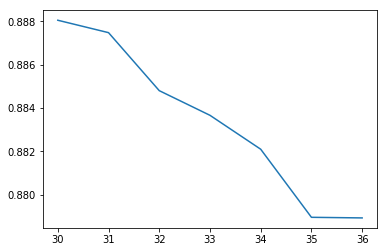

In [20]:
print("Calculando Elbow Curve")
plt.plot(error_label, distortions)
min_error = np.array(distortions).min()
print("Erro minimo: ",min_error)
k_min_error = np.nonzero(np.array(distortions) == min_error)[0][0]+starting_k
print("K do erro minimo: ",k_min_error)

Calculando Silhuette Curve
Coeficiente Maximo:  -0.2443979319974934
K do coeficiente Maximo:  20


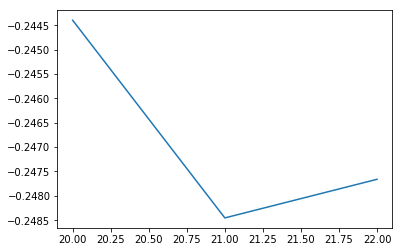

In [57]:
print("Calculando Silhuette Curve")
plt.plot(error_label, silhouette_avgs)
max_coef = np.array(silhouette_avgs).max()
print("Coeficiente Maximo: ",max_coef)
k_max_coef = np.nonzero(np.array(silhouette_avgs) == max_coef)[0][0]+starting_k
print("K do coeficiente Maximo: ",k_max_coef)

Calculando Calinsky Curve
Coeficiente Maximo:  17.741135767297173
K do coeficiente Maximo:  22


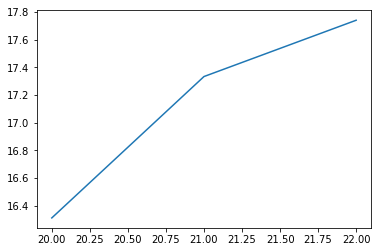

In [59]:
print("Calculando Calinsky Curve")
plt.plot(error_label, calinsky_avgs)
max_coef = np.array(calinsky_avgs).max()
print("Coeficiente Maximo: ",max_coef)
k_max_coef = np.nonzero(np.array(calinsky_avgs) == max_coef)[0][0]+starting_k
print("K do coeficiente Maximo: ",k_max_coef)

In [54]:
print("Generating clusters with best K.....")
k = int(k_min_error)
df_text = pd.read_csv("data/health.txt", sep="|")
df_text = np.array(df_text["headline_text"])
print(df_text[df_text.shape[0]-1])
print("Clusters with k = ", k)

# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(df.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_

# print(df.index)
# for j in range (k):
#     k_x = df.index[labels==j]
#     file_k = open("output/kmeans/clusters/k_"+str(j)+".txt", 'w+')
#     for i in range(df_text.shape[0]):
#         if i in k_x:
#             file_k.write(df_text[i]+"\n")
#     file_k.close()
# print(df.shape)

Generating clusters with best K.....
C. diff 'manslaughter' inquiry call
Clusters with k =  36


Creating World Clouds............
output/kmeans/clusters/k_0.txt
output/kmeans/clusters/k_1.txt
output/kmeans/clusters/k_2.txt
output/kmeans/clusters/k_3.txt
output/kmeans/clusters/k_4.txt
output/kmeans/clusters/k_5.txt
output/kmeans/clusters/k_6.txt
output/kmeans/clusters/k_7.txt
output/kmeans/clusters/k_8.txt
output/kmeans/clusters/k_9.txt
output/kmeans/clusters/k_10.txt
output/kmeans/clusters/k_11.txt
output/kmeans/clusters/k_12.txt
output/kmeans/clusters/k_13.txt
output/kmeans/clusters/k_14.txt
output/kmeans/clusters/k_15.txt
output/kmeans/clusters/k_16.txt
output/kmeans/clusters/k_17.txt
output/kmeans/clusters/k_18.txt
output/kmeans/clusters/k_19.txt


/home/leomelo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


output/kmeans/clusters/k_20.txt
output/kmeans/clusters/k_21.txt
output/kmeans/clusters/k_22.txt
output/kmeans/clusters/k_23.txt
output/kmeans/clusters/k_24.txt
output/kmeans/clusters/k_25.txt
output/kmeans/clusters/k_26.txt
output/kmeans/clusters/k_27.txt
output/kmeans/clusters/k_28.txt
output/kmeans/clusters/k_29.txt
output/kmeans/clusters/k_30.txt
output/kmeans/clusters/k_31.txt
output/kmeans/clusters/k_32.txt
output/kmeans/clusters/k_33.txt
output/kmeans/clusters/k_34.txt
output/kmeans/clusters/k_35.txt


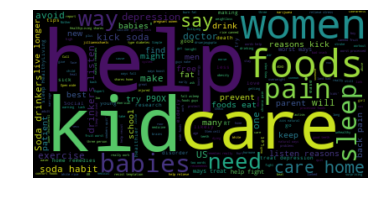

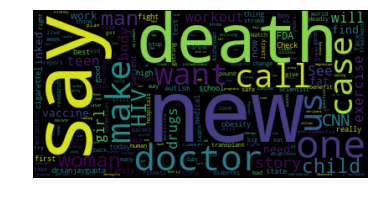

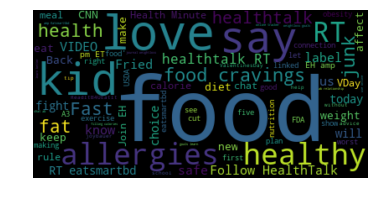

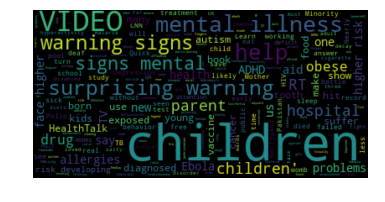

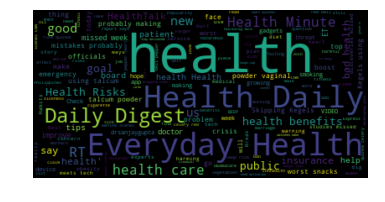

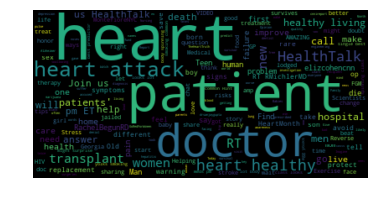

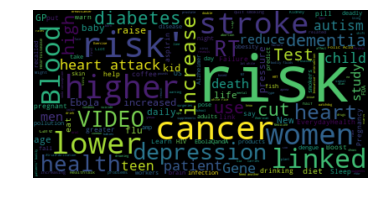

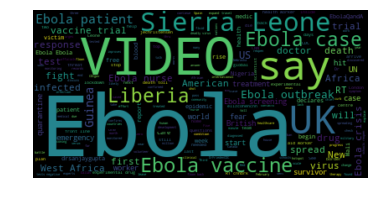

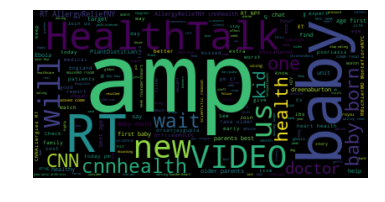

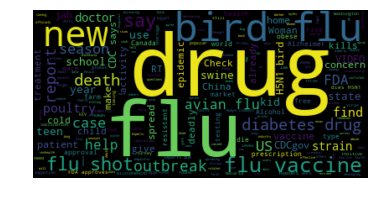

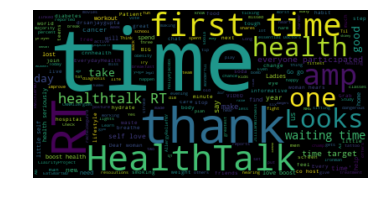

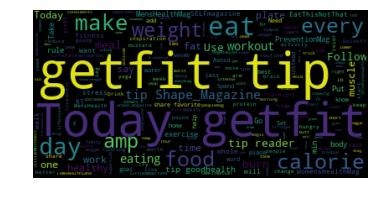

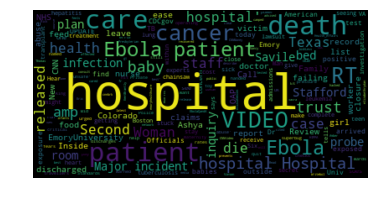

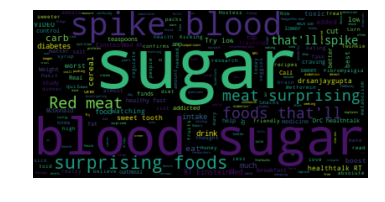

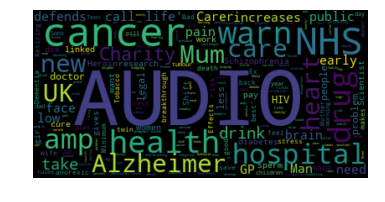

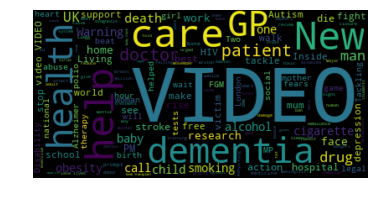

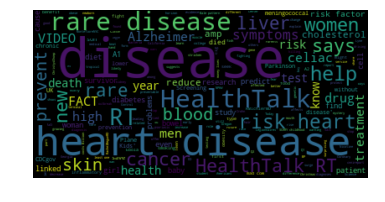

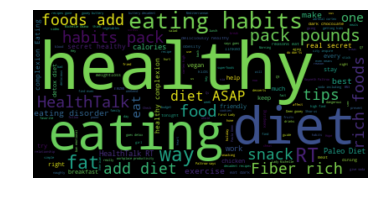

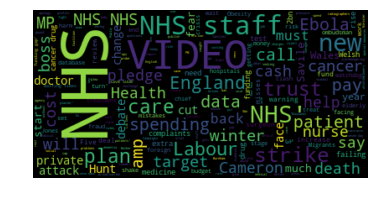

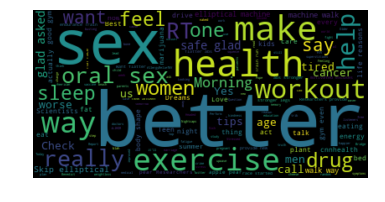

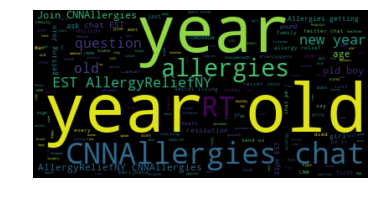

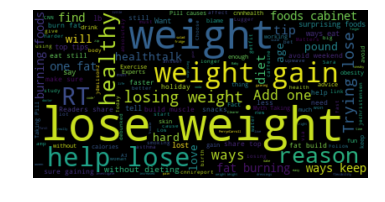

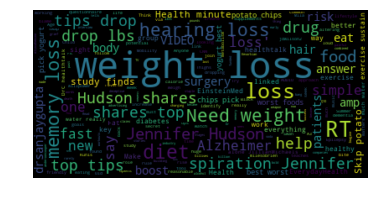

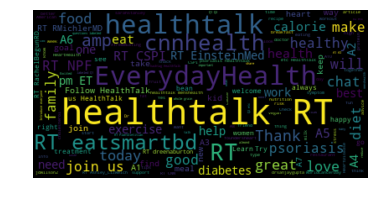

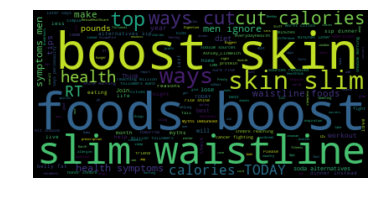

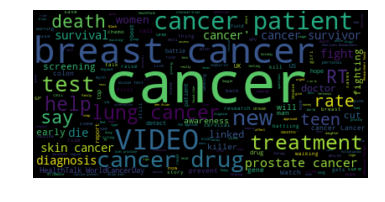

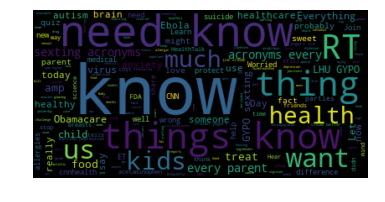

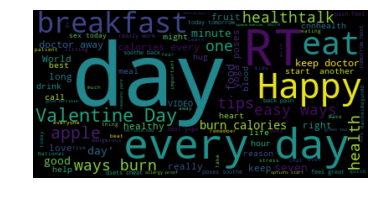

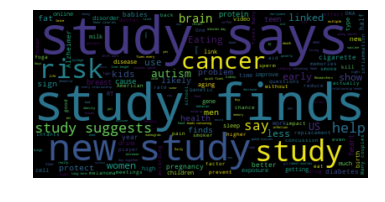

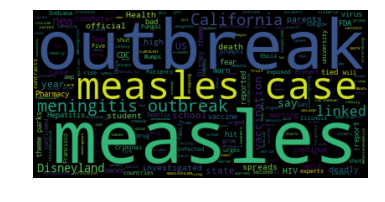

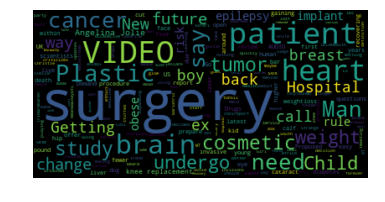

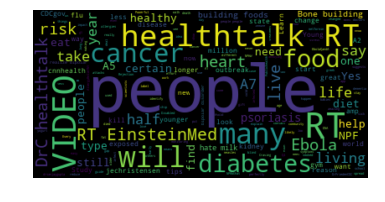

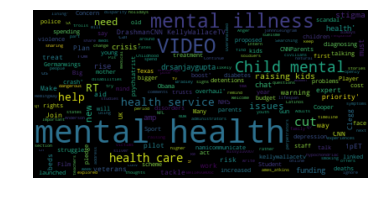

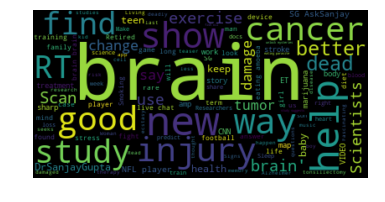

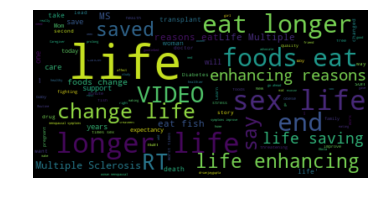

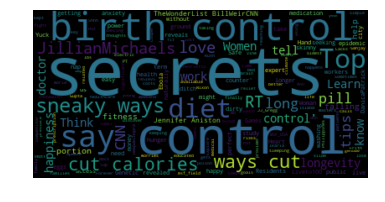

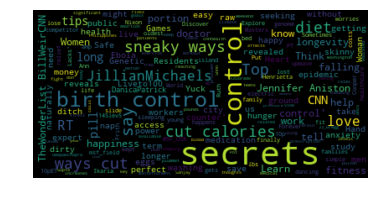

In [24]:
print("Creating World Clouds............")
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
stopwords = open("stopwords").read().splitlines()
for c in range (k):
    text = open(path.join(d, 'output/kmeans/clusters/k_'+str(c)+'.txt')).read()
    print('output/kmeans/clusters/k_'+str(c)+'.txt')

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("output/kmeans/wordclouds/k_"+str(c)+".png")
    

In [25]:
print("Calculating Medoids...........")
closest_data = []
for i in range(k):
    d = kmeans_model.transform(df[labels==i])[:, i]
    
    ind = np.argsort(d)[::-1][:4]
    
    #print(ind, df[labels==i].shape)
    
    closest_data.append(ind)

for i in range(k):
    df_text_i = df_text[labels == i]
    file_k = open("output/kmeans/medoids/k_"+str(i)+"_medoids.txt", 'w+')
    for n in range (len(closest_data[i])):
        file_k.write(np.take(df_text_i, closest_data[i][n])+"\n")
    file_k.close()
print("Done!")

Calculating Medoids...........
Done!


In [26]:
%load_ext wurlitzer
print(df.shape)
print(np.sum(labels==2))

(13229, 1203)
165


In [27]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

from MulticoreTSNE import MulticoreTSNE as TSNE

print("Iniciando TSNE..........")
tsne = TSNE(n_jobs=8, perplexity=400, verbose=1)
Y = tsne.fit_transform(df)

Iniciando TSNE..........


Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 400.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 13229
Done in 222.00 seconds (sparsity = 0.139179)!
Learning embedding...
Iteration 51: error is 66.024138 (50 iterations in 7.00 seconds)
Iteration 101: error is 66.024138 (50 iterations in 7.00 seconds)
Iteration 151: error is 66.024138 (50 iterations in 7.00 seconds)
Iteration 201: error is 66.024138 (50 iterations in 7.00 seconds)
Iteration 251: error is 3.017105 (50 iterations in 8.00 seconds)
Iteration 301: error is 3.017105 (50 iterations in 8.00 seconds)
Iteration 351: error is 3.017105 (50 iterations in 8.00 seconds)
Iteration 401: error is 3.017105 (50 iterations in 7.00 seconds)
Iteration 451: error is 2.775821 (50 iterations in 7.00 seconds)
Iteration 501: error is 2.709945 (50 iterations in 7.00 seconds)
Iteration 551: error is 2.702277 (50 iterations in 7.00 seconds)
Iteration 601: error is 2.699111 (50 iterati

Plot TSNE..........


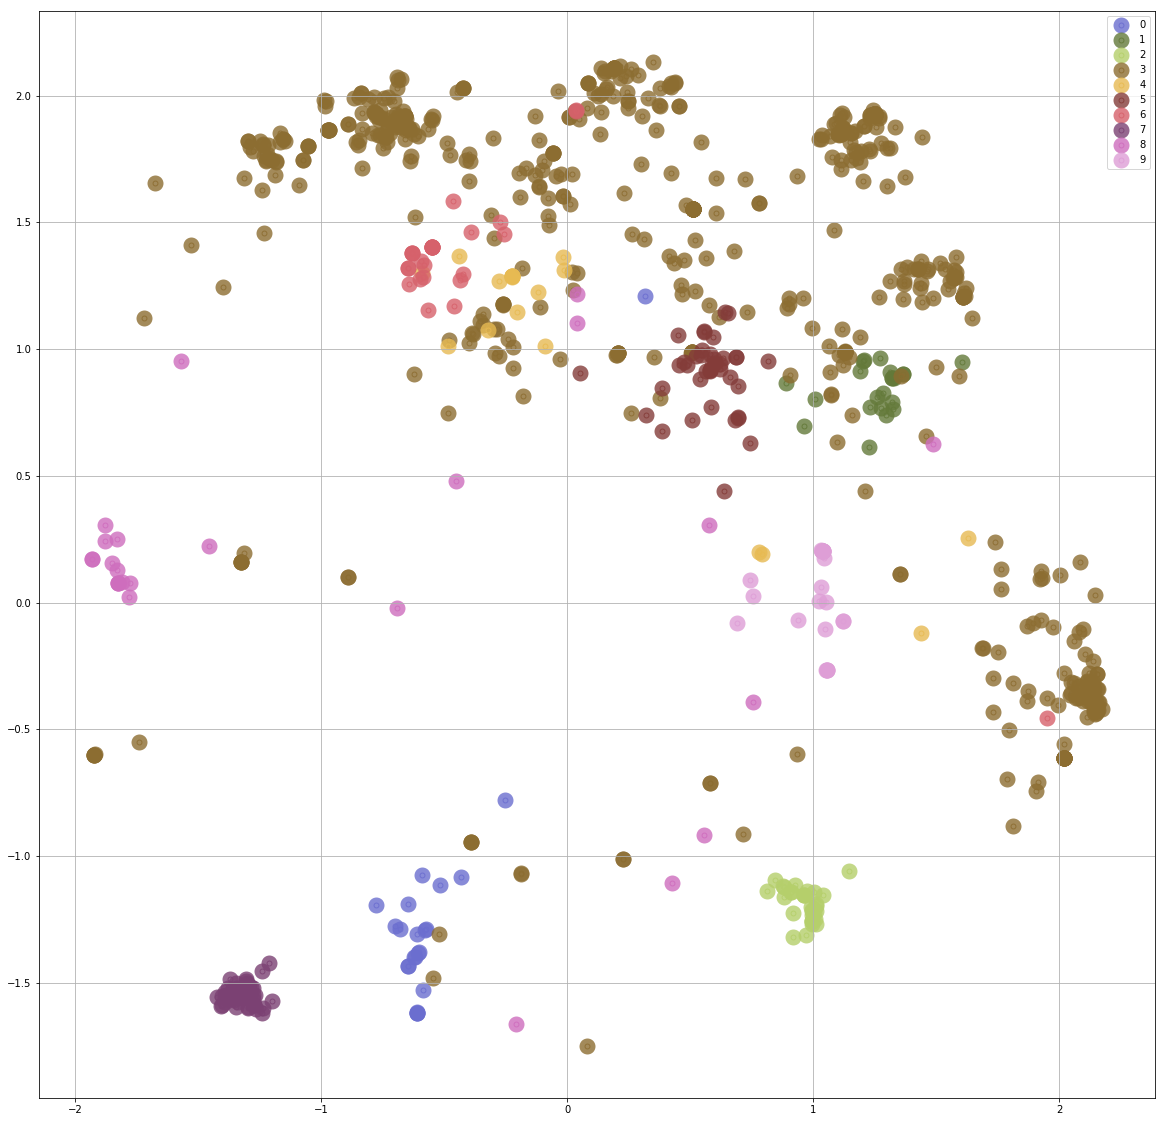

In [48]:
print("Plot TSNE..........")
tsne_result_scaled = StandardScaler().fit_transform(Y)

starting_cluster = 0
last_cluster = 10
aux = np.array(labels<=last_cluster) * np.array(labels>starting_cluster)

visualize_scatter(tsne_result_scaled[aux], labels[aux], starting_cluster=starting_cluster)

In [6]:
print("DBSCAN...............")
from sklearn.cluster import DBSCAN
# db = DBSCAN(eps=0.001, min_samples=5, n_jobs=-1).fit(df)
# labels = db.labels_


distortions = []
cost_old = 100
cost = 100
epsilon = 0.00001
error_label = []
silhouette_avgs = []
calinsky_avgs = []

starting_k = 20
final_k = 40
step = 1

for k in range (starting_k, final_k,step):
    
    print("Calculating metrics for min_samples = ", k)
    
    if (abs(cost > cost_old)):
        break
    
    cost_old = cost
    
    cost_eps = -100
    cost_old_eps = -100
    print("Calculating best eps...")
    for ep in range (7, 10, 1):
        print("eps = ", ep/10)
        if (abs(cost_eps < cost_old_eps)):
            break
        cost_old_eps = cost_eps
        # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
        db = DBSCAN(eps=ep/10, min_samples=k, n_jobs=-1).fit(df)
        # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
        labels = db.labels_
        #Calculate Silhouette score
        silhouette_avg = silhouette_score(df, labels)
        cost_eps = silhouette_avg
    
    print("Best eps = ", (ep-1)/10)
    
    print("Recalculating DBSCAN for best eps....")
    
    db = DBSCAN(eps=(ep-1)/10, min_samples=k, n_jobs=-1).fit(df)
    
    #Calculate Silhouette score
    print("Calculating Silhouette score...")
    silhouette_avg = silhouette_score(df, labels)
    silhouette_avgs.append(silhouette_avg)
    
    cost = silhouette_avg
    
    distortions.append(cost)
    error_label.append(k)
    print("Calculating Calinsky score......... ")
    calinsky_avg = calinski_harabaz_score(df,labels)
    calinsky_avgs.append(calinsky_avg)
print("Done!")

print("Numero de Clusteres obtido....")
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

# print("Calculating Silhouette score...")
# print("Silhouette Score: ",silhouette_score(df, labels))

# print("Calculating Calinski score: ", calinski_harabaz_score(df,labels))

DBSCAN...............
Calculating metrics for min_samples =  20
Calculating best eps...
eps =  0.7
eps =  0.8
eps =  0.9
Best eps =  0.8
Recalculating DBSCAN for best eps....
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for min_samples =  21
Calculating best eps...
eps =  0.7
eps =  0.8
eps =  0.9
Best eps =  0.8
Recalculating DBSCAN for best eps....
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for min_samples =  22
Calculating best eps...
eps =  0.7
eps =  0.8
eps =  0.9
Best eps =  0.8
Recalculating DBSCAN for best eps....
Calculating Silhouette score...
Calculating Calinsky score......... 
Calculating metrics for min_samples =  23
Done!
Numero de Clusteres obtido....
28


Calculando Silhuette Curve
Coeficiente Maximo:  -0.2443979319974934
K do coeficiente Maximo:  20


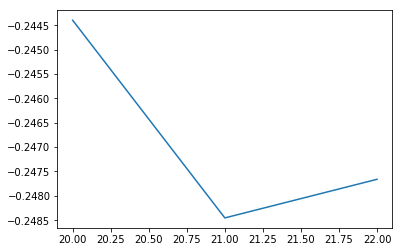

In [7]:
print("Calculando Silhuette Curve")
plt.plot(error_label, silhouette_avgs)
max_coef = np.array(silhouette_avgs).max()
print("Coeficiente Maximo: ",max_coef)
k_max_coef = np.nonzero(np.array(silhouette_avgs) == max_coef)[0][0]+starting_k
print("K do coeficiente Maximo: ",k_max_coef)

Calculando Calinsky Curve
Coeficiente Maximo:  17.741135767297173
K do coeficiente Maximo:  22


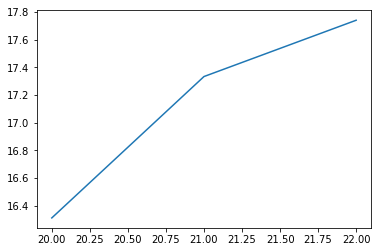

In [10]:
print("Calculando Calinsky Curve")
plt.plot(error_label, calinsky_avgs)
max_coef = np.array(calinsky_avgs).max()
print("Coeficiente Maximo: ",max_coef)
k_max_coef = np.nonzero(np.array(calinsky_avgs) == max_coef)[0][0]+starting_k
print("K do coeficiente Maximo: ",k_max_coef)

In [11]:
df_text = pd.read_csv("data/health.txt", sep="|")
df_text = np.array(df_text["headline_text"])

In [12]:
print(df.index)
for j in range (n_clusters_):
    k_x = df.index[labels==j]
    file_k = open("output/DB/clusters/k_"+str(j)+".txt", 'w+')
    for i in range(df_text.shape[0]):
        if i in k_x:
            file_k.write(df_text[i]+"\n")
    file_k.close()
print(df.shape)

RangeIndex(start=0, stop=13229, step=1)
(13229, 1203)


Creating World Clouds............
output/DB/clusters/k_0.txt
output/DB/clusters/k_1.txt
output/DB/clusters/k_2.txt
output/DB/clusters/k_3.txt
output/DB/clusters/k_4.txt
output/DB/clusters/k_5.txt
output/DB/clusters/k_6.txt
output/DB/clusters/k_7.txt
output/DB/clusters/k_8.txt
output/DB/clusters/k_9.txt
output/DB/clusters/k_10.txt
output/DB/clusters/k_11.txt
output/DB/clusters/k_12.txt
output/DB/clusters/k_13.txt
output/DB/clusters/k_14.txt
output/DB/clusters/k_15.txt
output/DB/clusters/k_16.txt
output/DB/clusters/k_17.txt
output/DB/clusters/k_18.txt
output/DB/clusters/k_19.txt


/home/leomelo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


output/DB/clusters/k_20.txt
output/DB/clusters/k_21.txt
output/DB/clusters/k_22.txt
output/DB/clusters/k_23.txt
output/DB/clusters/k_24.txt
output/DB/clusters/k_25.txt
output/DB/clusters/k_26.txt
output/DB/clusters/k_27.txt


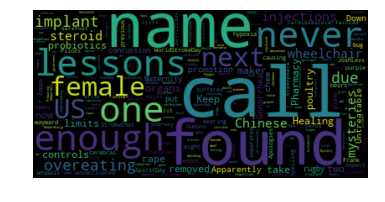

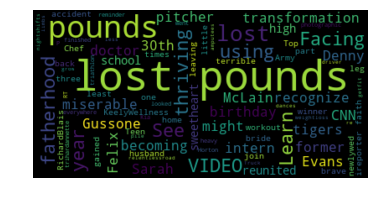

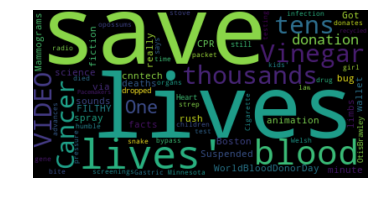

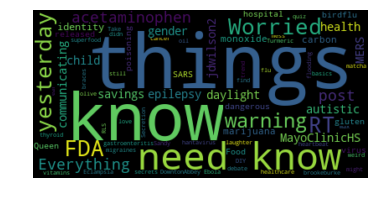

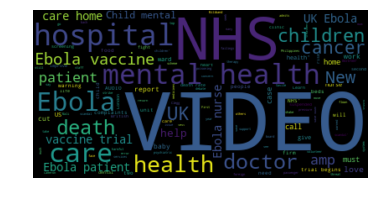

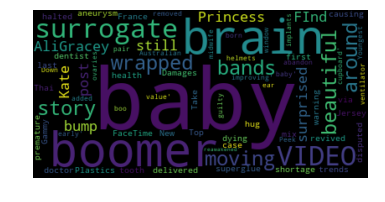

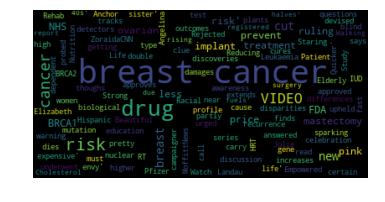

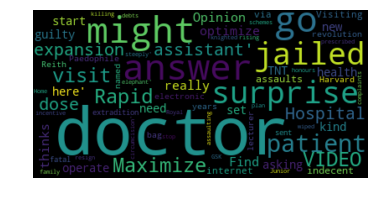

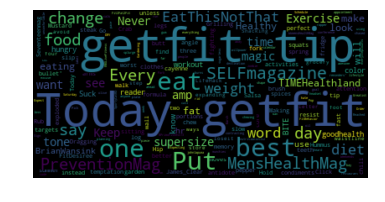

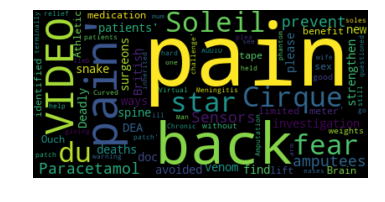

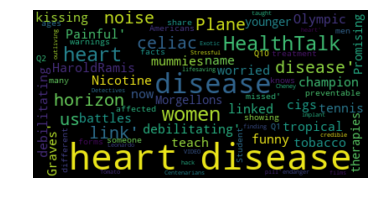

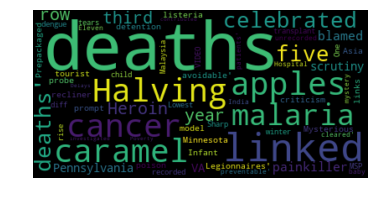

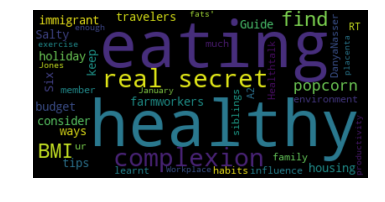

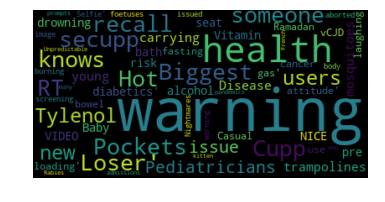

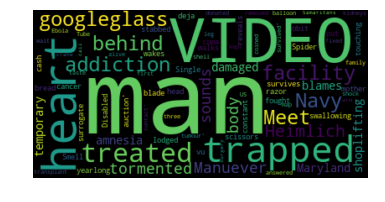

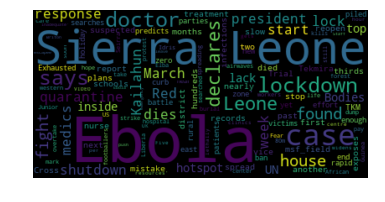

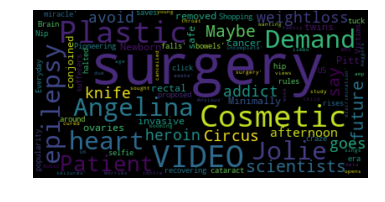

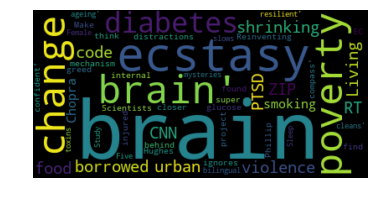

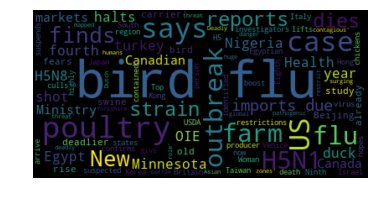

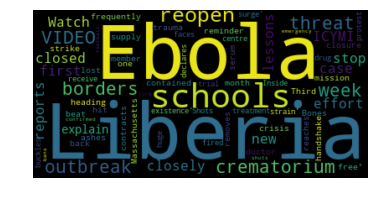

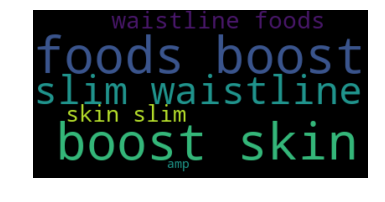

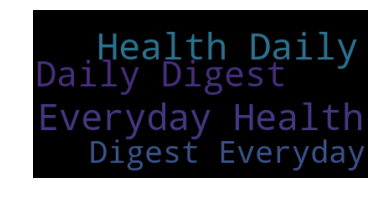

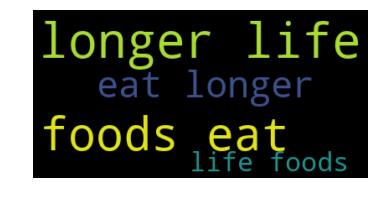

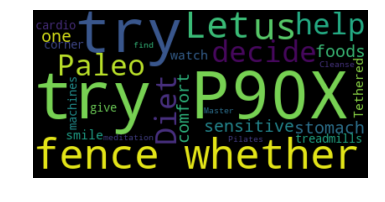

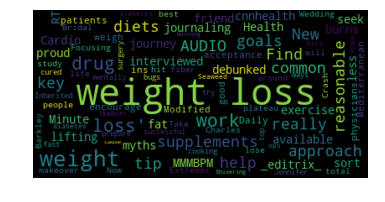

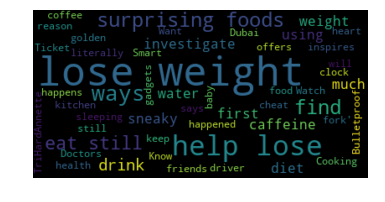

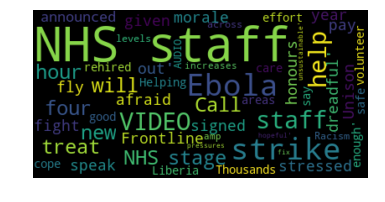

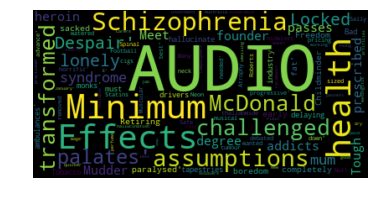

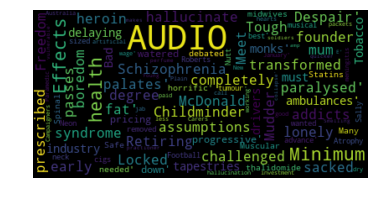

In [13]:
print("Creating World Clouds............")
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
stopwords = open("stopwords").read().splitlines()
for c in range (n_clusters_):
    text = open(path.join(d, 'output/DB/clusters/k_'+str(c)+'.txt')).read()
    print('output/DB/clusters/k_'+str(c)+'.txt')

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("output/DB/wordclouds/k_"+str(c)+".png")

In [14]:
%load_ext wurlitzer
print(np.sum(labels==-1)-np.sum(labels!=-2))

-1438


In [15]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

print("Calculando TSNE...........")

from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=8, perplexity=400, verbose=1)
Y = tsne.fit_transform(df)

Calculando TSNE...........


Performing t-SNE using 8 cores.
Using no_dims = 2, perplexity = 400.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 13229
Done in 177.00 seconds (sparsity = 0.139179)!
Learning embedding...
Iteration 51: error is 66.024138 (50 iterations in 7.00 seconds)
Iteration 101: error is 66.024138 (50 iterations in 6.00 seconds)
Iteration 151: error is 66.024138 (50 iterations in 5.00 seconds)
Iteration 201: error is 66.024138 (50 iterations in 6.00 seconds)
Iteration 251: error is 3.017105 (50 iterations in 6.00 seconds)
Iteration 301: error is 3.017105 (50 iterations in 7.00 seconds)
Iteration 351: error is 3.017105 (50 iterations in 6.00 seconds)
Iteration 401: error is 3.017105 (50 iterations in 6.00 seconds)
Iteration 451: error is 2.775821 (50 iterations in 6.00 seconds)
Iteration 501: error is 2.709945 (50 iterations in 6.00 seconds)
Iteration 551: error is 2.702275 (50 iterations in 6.00 seconds)
Iteration 601: error is 2.699122 (50 iterati

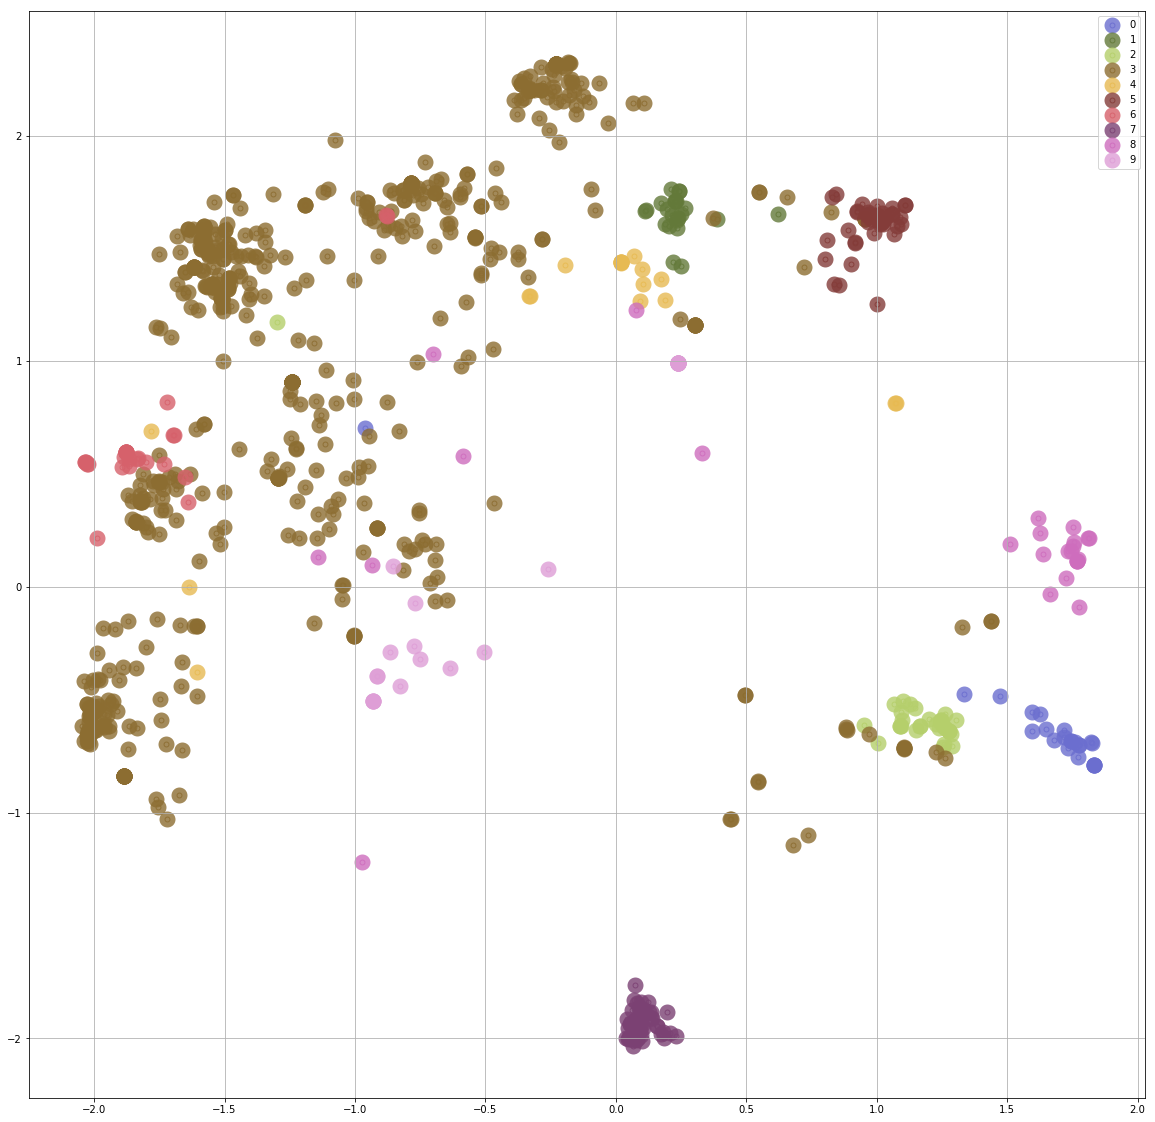

In [16]:
tsne_result_scaled = StandardScaler().fit_transform(Y)

starting_cluster = 0
last_cluster = 10
aux = np.array(labels<=last_cluster) * np.array(labels>starting_cluster)

visualize_scatter(tsne_result_scaled[aux], labels[aux], starting_cluster=starting_cluster)